<a href="https://colab.research.google.com/github/guimaraaes/data-science/blob/master/pycaret-IBM_RH_Analytics_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
%matplotlib inline
from pandas.plotting import scatter_matrix
import warnings
warnings.filterwarnings('ignore') 

In [ ]:
# 1
from google.colab import drive
drive.mount('/content/gdrive')
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Kaggle"
# /content/gdrive/My Drive/Kaggle is the path where kaggle.json is present in the Google Drive

# 2
#descomentar apenas para o primeiro download
# %cd /content/gdrive/My Drive/Kaggle/ibm-hr-analytics-attrition-dataset/
# ! kaggle datasets download -d pavansubhasht/ibm-hr-analytics-attrition-dataset
# ! unzip \*.zip  && rm *.zip

# 3
data=pd.read_csv('/content/gdrive/My Drive/Kaggle/ibm-hr-analytics-attrition-dataset/WA_Fn-UseC_-HR-Employee-Attrition.csv')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [ ]:
print("variáveis: ", data.shape[1])
print("dados:     ", data.shape[0])

variáveis:  35
dados:      1470


In [ ]:
data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [ ]:
data.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

In [ ]:
print('Attrition:', data['Attrition'].unique(), ' \n')
print('BusinessTravel', data['BusinessTravel'].unique(), ' \n')
print('Department', data['Department'].unique(), ' \n')
print('Education', data['Education'].unique(), ' \n')
print('EducationField', data['EducationField'].unique(), ' \n')

print('EmployeeCount:', data['EmployeeCount'].unique(), ' \n')
print('EnvironmentSatisfaction', data['EnvironmentSatisfaction'].unique(), ' \n')
print('Gender', data['Gender'].unique(), ' \n')
print('JobInvolvement', data['JobInvolvement'].unique(), ' \n')
print('JobLevel', data['JobLevel'].unique(), ' \n')

print('JobRole:', data['JobRole'].unique(), ' \n')
print('JobSatisfaction', data['JobSatisfaction'].unique(), ' \n')
print('MaritalStatus', data['MaritalStatus'].unique(), ' \n')
print('NumCompaniesWorked', data['NumCompaniesWorked'].unique(), ' \n')
print('Over18', data['Over18'].unique(), ' \n')

print('OverTime:', data['OverTime'].unique(), ' \n')
print('PercentSalaryHike', data['PercentSalaryHike'].unique(), ' \n')
print('PerformanceRating', data['PerformanceRating'].unique(), ' \n')
print('RelationshipSatisfaction', data['RelationshipSatisfaction'].unique(), ' \n')
print('StandardHours', data['StandardHours'].unique(), ' \n')

print('StockOptionLevel', data['StockOptionLevel'].unique(), ' \n')
print('TrainingTimesLastYear', data['TrainingTimesLastYear'].unique(), ' \n')
print('WorkLifeBalance', data['WorkLifeBalance'].unique(), ' \n')

Attrition: ['Yes' 'No']  

BusinessTravel ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']  

Department ['Sales' 'Research & Development' 'Human Resources']  

Education [2 1 4 3 5]  

EducationField ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']  

EmployeeCount: [1]  

EnvironmentSatisfaction [2 3 4 1]  

Gender ['Female' 'Male']  

JobInvolvement [3 2 4 1]  

JobLevel [2 1 3 4 5]  

JobRole: ['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources']  

JobSatisfaction [4 2 3 1]  

MaritalStatus ['Single' 'Married' 'Divorced']  

NumCompaniesWorked [8 1 6 9 0 4 5 2 7 3]  

Over18 ['Y']  

OverTime: ['Yes' 'No']  

PercentSalaryHike [11 23 15 12 13 20 22 21 17 14 16 18 19 24 25]  

PerformanceRating [3 4]  

RelationshipSatisfaction [1 4 2 3]  

StandardHours [80]  

StockOptionLevel [0 1 3 2]  

TrainingTimesLast

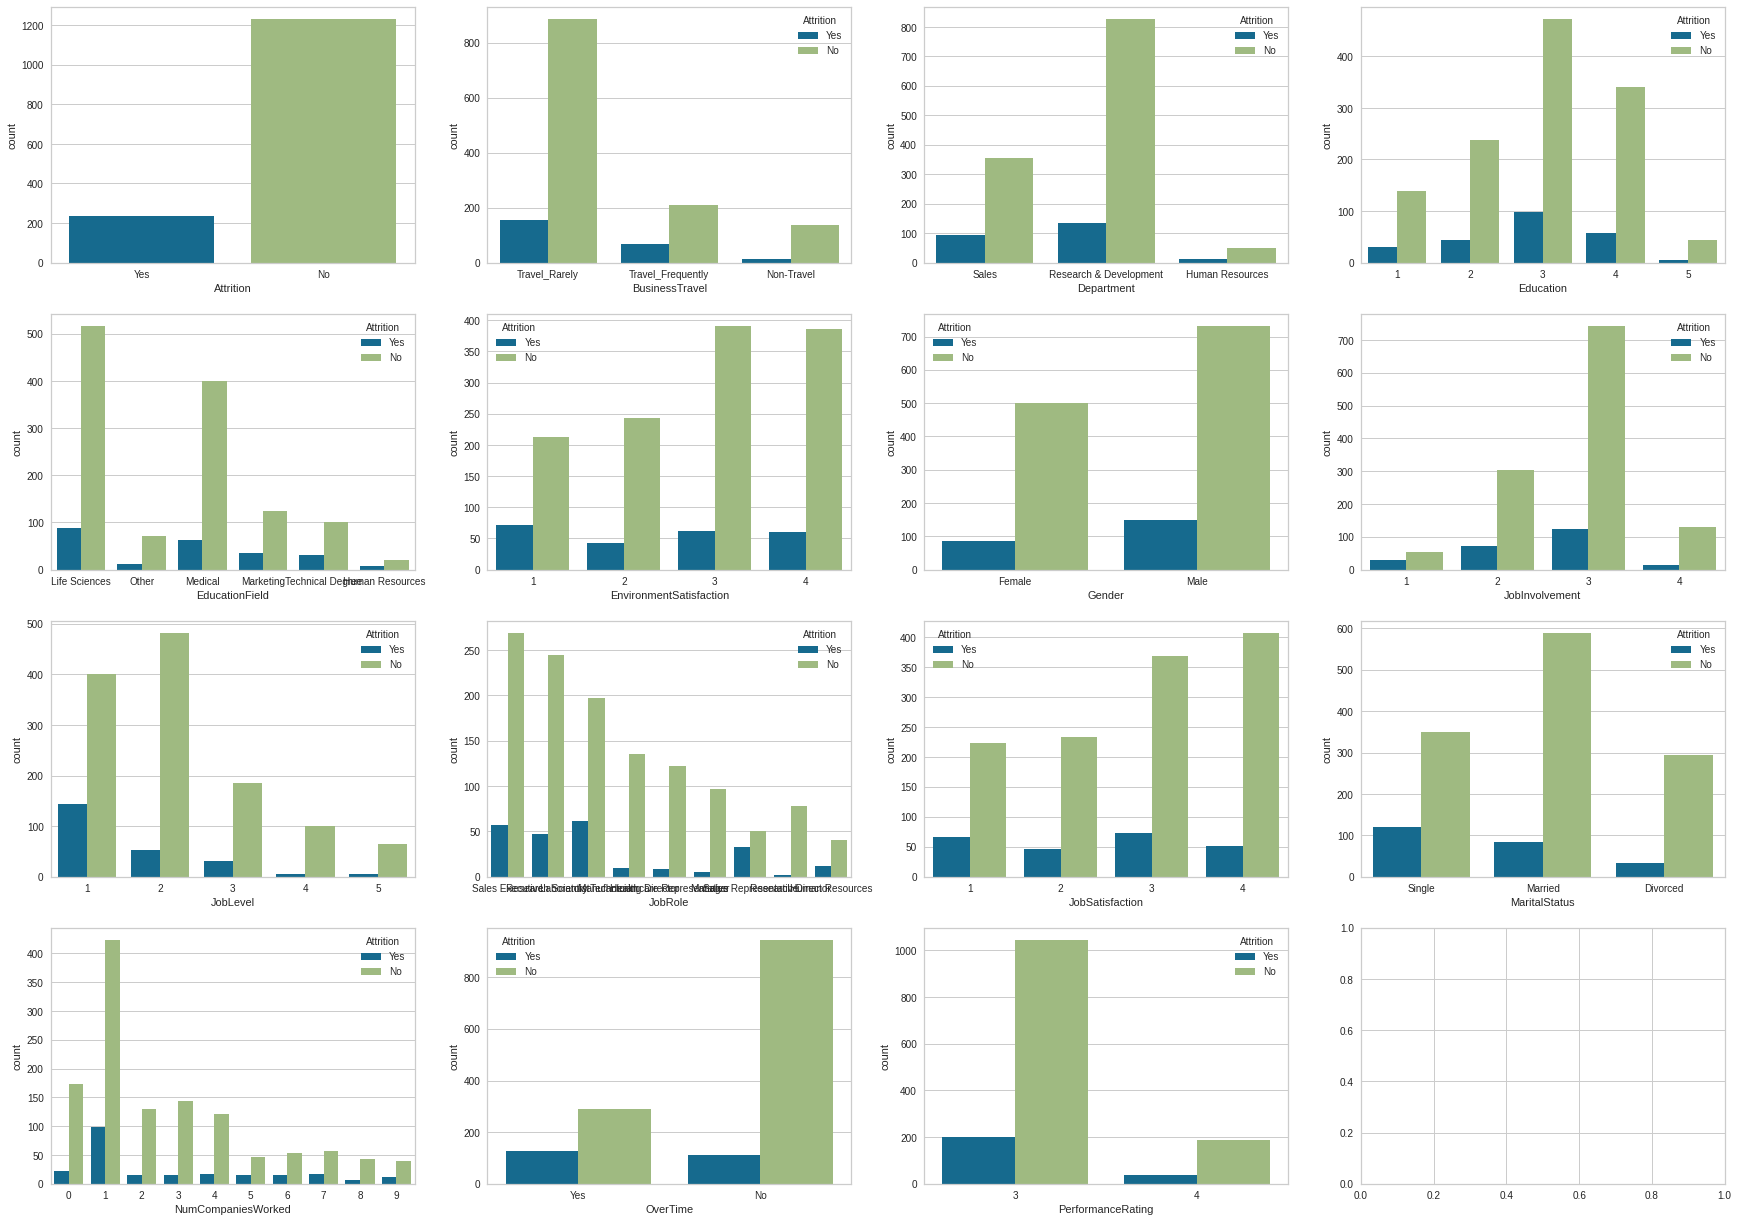

In [ ]:
fig, axes = plt.subplots(4, 4, figsize=(30, 3))
fig.subplots_adjust( bottom=0.05, top=5.5)

sns.countplot(x=data.Attrition, ax=axes[0, 0])
sns.countplot(x=data.BusinessTravel, hue=data.Attrition, ax=axes[0, 1])
sns.countplot(x=data.Department, hue=data.Attrition, ax=axes[0, 2])
sns.countplot(x=data.Education, hue=data.Attrition, ax=axes[0, 3])

sns.countplot(x=data.EducationField, hue=data.Attrition, ax=axes[1, 0])
sns.countplot(x=data.EnvironmentSatisfaction, hue=data.Attrition, ax=axes[1, 1])
sns.countplot(x=data.Gender, hue=data.Attrition, ax=axes[1, 2])
sns.countplot(x=data.JobInvolvement, hue=data.Attrition, ax=axes[1, 3])

sns.countplot(x=data.JobLevel, hue=data.Attrition, ax=axes[2, 0])
sns.countplot(x=data.JobRole, hue=data.Attrition, ax=axes[2, 1])
sns.countplot(x=data.JobSatisfaction, hue=data.Attrition, ax=axes[2, 2])
sns.countplot(x=data.MaritalStatus, hue=data.Attrition, ax=axes[2, 3])

sns.countplot(x=data.NumCompaniesWorked, hue=data.Attrition, ax=axes[3, 0])
sns.countplot(x=data.OverTime, hue=data.Attrition, ax=axes[3, 1])
sns.countplot(x=data.PerformanceRating, hue=data.Attrition, ax=axes[3, 2])

In [ ]:
!pip install pycaret -q

In [ ]:
# y = data['Attrition']
# X = data.drop('Attrition', axis='columns', inplace=True)
test = data.sample(frac=0.10)
train = data.drop(test.index)

test.reset_index(inplace=True, drop=True)
train.reset_index(inplace=True, drop=True)

In [ ]:
# from sklearn.model_selection import train_test_split
# X_train, X_test = train_test_split(data, test_size=0.33)
# X_test


In [ ]:
# test

In [ ]:
from pycaret.utils import enable_colab 
enable_colab()

Colab mode enabled.


In [ ]:
from pycaret.classification import setup, compare_models, models, create_model, predict_model
from pycaret.classification import tune_model, plot_model, evaluate_model, finalize_model
from pycaret.classification import save_model, load_model

In [ ]:
clf = setup(data=train, target='Attrition')

,Description,Value
0,session_id,4515
1,Target,Attrition
2,Target Type,Binary
3,Label Encoded,"No: 0, Yes: 1"
4,Original Data,"(1323, 35)"
5,Missing Values,False
6,Numeric Features,9
7,Categorical Features,25
8,Ordinal Features,False
9,High Cardinality Features,False


In [ ]:
best = compare_models(sort='Accuracy')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ridge,Ridge Classifier,0.8726,0.0000,0.6617,0.8591,0.8514,0.3962,0.4345,0.022
lr,Logistic Regression,0.8704,0.8189,0.6661,0.8605,0.8515,0.4011,0.4382,0.677
catboost,CatBoost Classifier,0.8661,0.8110,0.6009,0.8657,0.8288,0.2835,0.3732,2.992
lightgbm,Light Gradient Boosting Machine,0.8650,0.7777,0.6325,0.8539,0.8388,0.3389,0.3922,0.121
gbc,Gradient Boosting Classifier,0.8597,0.7986,0.6215,0.8378,0.8327,0.3133,0.3533,0.399
xgboost,Extreme Gradient Boosting,0.8564,0.7712,0.6220,0.8407,0.8310,0.3105,0.3548,0.714
rf,Random Forest Classifier,0.8510,0.8018,0.5452,0.8378,0.7971,0.1393,0.2365,0.561
et,Extra Trees Classifier,0.8510,0.7991,0.5538,0.8249,0.8009,0.1591,0.2365,0.515
lda,Linear Discriminant Analysis,0.8500,0.8346,0.6888,0.8425,0.8433,0.4011,0.4090,0.049
ada,Ada Boost Classifier,0.8478,0.7619,0.6465,0.8315,0.8314,0.3328,0.3521,0.184


In [ ]:
lightgbm = create_model('ridge')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8925,0.0,0.6936,0.8892,0.8755,0.4935,0.5398
1,0.8495,0.0,0.5872,0.8211,0.8164,0.2386,0.2843
2,0.8495,0.0,0.5872,0.8211,0.8164,0.2386,0.2843
3,0.8817,0.0,0.6603,0.8767,0.8596,0.4230,0.4798
4,0.8602,0.0,0.6744,0.8445,0.8484,0.4030,0.4140
5,0.8817,0.0,0.7679,0.8787,0.8801,0.5507,0.5512
6,0.9130,0.0,0.7729,0.9075,0.9069,0.6183,0.6298
7,0.8478,0.0,0.5870,0.8193,0.8144,0.2379,0.2836
8,0.8913,0.0,0.6935,0.8881,0.8742,0.4928,0.5392
9,0.8587,0.0,0.5935,0.8451,0.8225,0.2654,0.3388


In [ ]:
tuned_lightgbm = tune_model(lightgbm, optimize='Accuracy')
print(tuned_lightgbm)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8710,0.0,0.6269,0.8629,0.8426,0.3474,0.4139
1,0.8495,0.0,0.5872,0.8211,0.8164,0.2386,0.2843
2,0.8495,0.0,0.5872,0.8211,0.8164,0.2386,0.2843
3,0.9032,0.0,0.7000,0.9132,0.8851,0.5279,0.5988
4,0.8602,0.0,0.6744,0.8445,0.8484,0.4030,0.4140
5,0.8925,0.0,0.7474,0.8844,0.8855,0.5546,0.5636
6,0.9130,0.0,0.7436,0.9103,0.9028,0.5911,0.6210
7,0.8478,0.0,0.5870,0.8193,0.8144,0.2379,0.2836
8,0.8804,0.0,0.6602,0.8755,0.8581,0.4224,0.4793
9,0.8696,0.0,0.6000,0.8872,0.8308,0.2950,0.4160


RidgeClassifier(alpha=4.09, class_weight=None, copy_X=True, fit_intercept=False,
                max_iter=None, normalize=True, random_state=4515, solver='auto',
                tol=0.001)


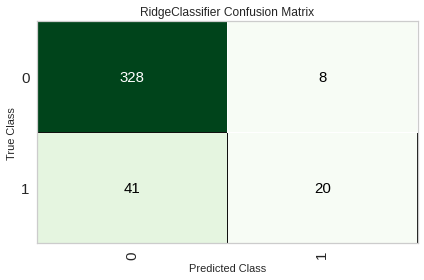

In [ ]:
plot_model(tuned_lightgbm, plot='confusion_matrix') #Accuracy

In [ ]:
final_dt = finalize_model(tuned_lightgbm)
print(tuned_lightgbm)
save_model(tuned_lightgbm, "lightgbm")
saved_model_dt = load_model("lightgbm")

RidgeClassifier(alpha=4.09, class_weight=None, copy_X=True, fit_intercept=False,
                max_iter=None, normalize=True, random_state=4515, solver='auto',
                tol=0.001)
Transformation Pipeline and Model Succesfully Saved
Transformation Pipeline and Model Successfully Loaded


In [ ]:
print(X_test.shape)
print(X_train.shape)

(486, 35)
(984, 35)


In [ ]:
test_preds = predict_model(final_dt, data=X_train)
# test_preds 

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Label
452,45,No,Travel_Rarely,561,Sales,2,3,Other,1,606,4,Male,61,3,2,Sales Executive,2,Married,4805,16177,0,Y,No,19,3,2,80,1,9,3,4,8,7,3,7,No
346,41,No,Travel_Rarely,483,Research & Development,6,3,Medical,1,466,4,Male,95,2,2,Manufacturing Director,2,Single,6032,10110,6,Y,Yes,15,3,4,80,0,8,3,3,5,4,1,2,No
1214,44,No,Travel_Rarely,921,Research & Development,2,3,Life Sciences,1,1703,3,Female,96,4,3,Healthcare Representative,4,Married,7879,14810,1,Y,Yes,19,3,2,80,1,9,2,3,8,7,6,7,No
381,30,No,Travel_Rarely,202,Sales,2,1,Technical Degree,1,508,3,Male,72,3,1,Sales Representative,2,Married,2476,17434,1,Y,No,18,3,1,80,1,1,3,3,1,0,0,0,No
1315,36,No,Travel_Rarely,430,Research & Development,2,4,Other,1,1847,4,Female,73,3,2,Research Scientist,2,Married,6962,19573,4,Y,Yes,22,4,4,80,1,15,2,3,1,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
817,36,No,Non-Travel,217,Research & Development,18,4,Life Sciences,1,1133,1,Male,78,3,2,Manufacturing Director,4,Single,7779,23238,2,Y,No,20,4,1,80,0,18,0,3,11,9,0,9,No
579,34,No,Travel_Rarely,121,Research & Development,2,4,Medical,1,804,3,Female,86,2,1,Research Scientist,1,Single,4381,7530,1,Y,No,11,3,3,80,0,6,3,3,6,5,1,3,No
654,39,No,Travel_Rarely,1383,Human Resources,2,3,Life Sciences,1,909,4,Female,42,2,2,Human Resources,4,Married,5204,7790,8,Y,No,11,3,3,80,2,13,2,3,5,4,0,4,No
498,22,No,Travel_Rarely,604,Research & Development,6,1,Medical,1,675,1,Male,69,3,1,Research Scientist,3,Married,2773,12145,0,Y,No,20,4,4,80,0,3,3,3,2,2,2,2,No


In [ ]:
# plot_model(test_preds, plot='confusion_matrix') #Accuracy
from pycaret.utils import check_metric
check_metric(test_preds.Attrition, test_preds.Label, 'Accuracy')

0.9035

In [ ]:
# plot_model(test_preds, plot='confusion_matrix')